In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=["label", "message"])

In [ ]:
# Encode Labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [ ]:
# Text Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

df['cleaned'] = df['message'].apply(clean_text)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['cleaned'])
y = df['label']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Models

## Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

## Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

## Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [ ]:
# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"📊 {name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

📊 Naive Bayes Performance:
Accuracy: 0.9659192825112107
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



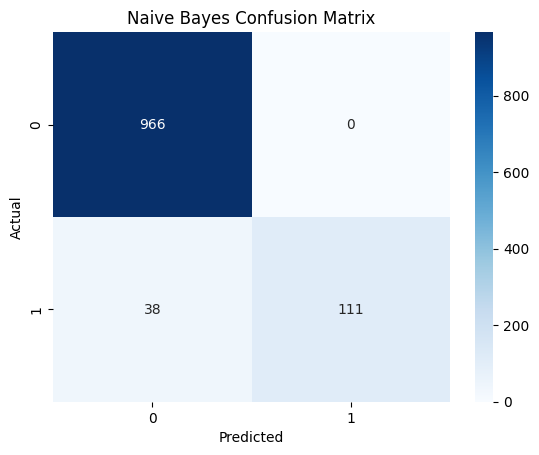

📊 Logistic Regression Performance:
Accuracy: 0.9605381165919282
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



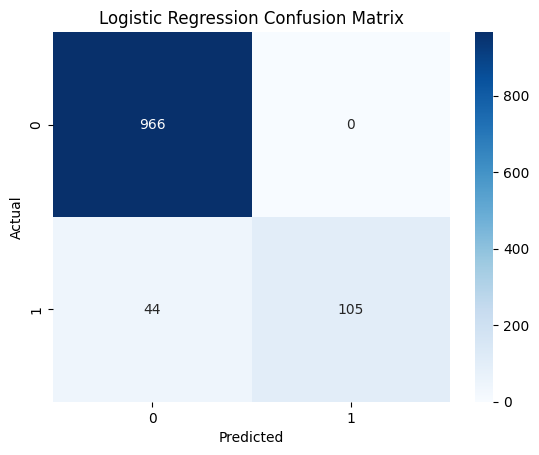

📊 SVM Performance:
Accuracy: 0.9847533632286996
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



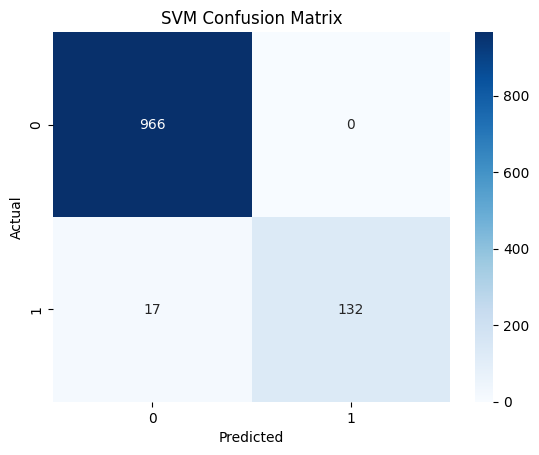

In [ ]:
# Evaluate Each Model
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("SVM", y_test, svm_preds)


In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Sample training from earlier
X_train, X_test, y_train, y_test  # already created during training step

# Train the model again (if not already trained)
best_model = LinearSVC()
best_model.fit(X_train, y_train)

# TF-IDF must be the same one used for training
# If tfidf wasn't saved, recreate and fit it on the full dataset
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['cleaned'])  # use entire cleaned dataset for consistency

# Sample input messages
sample_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim it.",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your account has been suspended. Verify now.",
    "I'll be late for the meeting. Stuck in traffic!",
    "Get cheap meds without prescription. Limited time only!"
]

# Clean them
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

cleaned_samples = [clean_text(msg) for msg in sample_messages]

# Vectorize and predict
sample_vectors = tfidf.transform(cleaned_samples)
predictions = best_model.predict(sample_vectors)

# Output
for msg, pred in zip(sample_messages, predictions):
    label = "SPAM ❌" if pred == 1 else "HAM ✅"
    print(f"📩 Message: \"{msg}\"\n🔎 Prediction: {label}\n")

📩 Message: "Congratulations! You've won a free iPhone. Click here to claim it."
🔎 Prediction: SPAM ❌

📩 Message: "Hey, are we still meeting for lunch today?"
🔎 Prediction: HAM ✅

📩 Message: "URGENT! Your account has been suspended. Verify now."
🔎 Prediction: SPAM ❌

📩 Message: "I'll be late for the meeting. Stuck in traffic!"
🔎 Prediction: HAM ✅

📩 Message: "Get cheap meds without prescription. Limited time only!"
🔎 Prediction: HAM ✅



In [ ]:
# Ensure required libraries are available
import re

# 🧼 Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove digits
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    return text.strip()

# 🧠 Load/define the trained model and vectorizer again (if needed)
# (Assumes `best_model` and `tfidf` are trained and available)

# 🔁 Interactive prediction loop
while True:
    user_input = input("📨 Enter an SMS message (or type 'exit' to quit):\n> ")

    if user_input.lower() == 'exit':
        print("👋 Exiting SMS classifier. Stay safe from spam!")
        break

    # Clean and vectorize input
    cleaned = clean_text(user_input)
    vector = tfidf.transform([cleaned])

    # Predict and display
    prediction = best_model.predict(vector)[0]
    label = "SPAM ❌" if prediction == 1 else "HAM ✅"

    print(f"\n🔎 Prediction: {label}\n{'-'*50}")

📨 Enter an SMS message (or type 'exit' to quit):
> exit
👋 Exiting SMS classifier. Stay safe from spam!
